In [17]:
import pandas as pd

# Charger le fichier CSV
file_path = "DSL-StrongPasswordData.csv"
data = pd.read_csv(file_path)

# Afficher les premières lignes et les informations générales
data_info = data.info()
data_head = data.head()
data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject          20400 non-null  object 
 1   sessionIndex     20400 non-null  int64  
 2   rep              20400 non-null  int64  
 3   H.period         20400 non-null  float64
 4   DD.period.t      20400 non-null  float64
 5   UD.period.t      20400 non-null  float64
 6   H.t              20400 non-null  float64
 7   DD.t.i           20400 non-null  float64
 8   UD.t.i           20400 non-null  float64
 9   H.i              20400 non-null  float64
 10  DD.i.e           20400 non-null  float64
 11  UD.i.e           20400 non-null  float64
 12  H.e              20400 non-null  float64
 13  DD.e.five        20400 non-null  float64
 14  UD.e.five        20400 non-null  float64
 15  H.five           20400 non-null  float64
 16  DD.five.Shift.r  20400 non-null  float64
 17  UD.five.Shif

(None,
   subject  sessionIndex  rep  H.period  DD.period.t  UD.period.t     H.t  \
 0    s002             1    1    0.1491       0.3979       0.2488  0.1069   
 1    s002             1    2    0.1111       0.3451       0.2340  0.0694   
 2    s002             1    3    0.1328       0.2072       0.0744  0.0731   
 3    s002             1    4    0.1291       0.2515       0.1224  0.1059   
 4    s002             1    5    0.1249       0.2317       0.1068  0.0895   
 
    DD.t.i  UD.t.i     H.i  ...     H.a  DD.a.n  UD.a.n     H.n  DD.n.l  \
 0  0.1674  0.0605  0.1169  ...  0.1349  0.1484  0.0135  0.0932  0.3515   
 1  0.1283  0.0589  0.0908  ...  0.1412  0.2558  0.1146  0.1146  0.2642   
 2  0.1291  0.0560  0.0821  ...  0.1621  0.2332  0.0711  0.1172  0.2705   
 3  0.2495  0.1436  0.1040  ...  0.1457  0.1629  0.0172  0.0866  0.2341   
 4  0.1676  0.0781  0.0903  ...  0.1312  0.1582  0.0270  0.0884  0.2517   
 
    UD.n.l     H.l  DD.l.Return  UD.l.Return  H.Return  
 0  0.2583  0.1338  

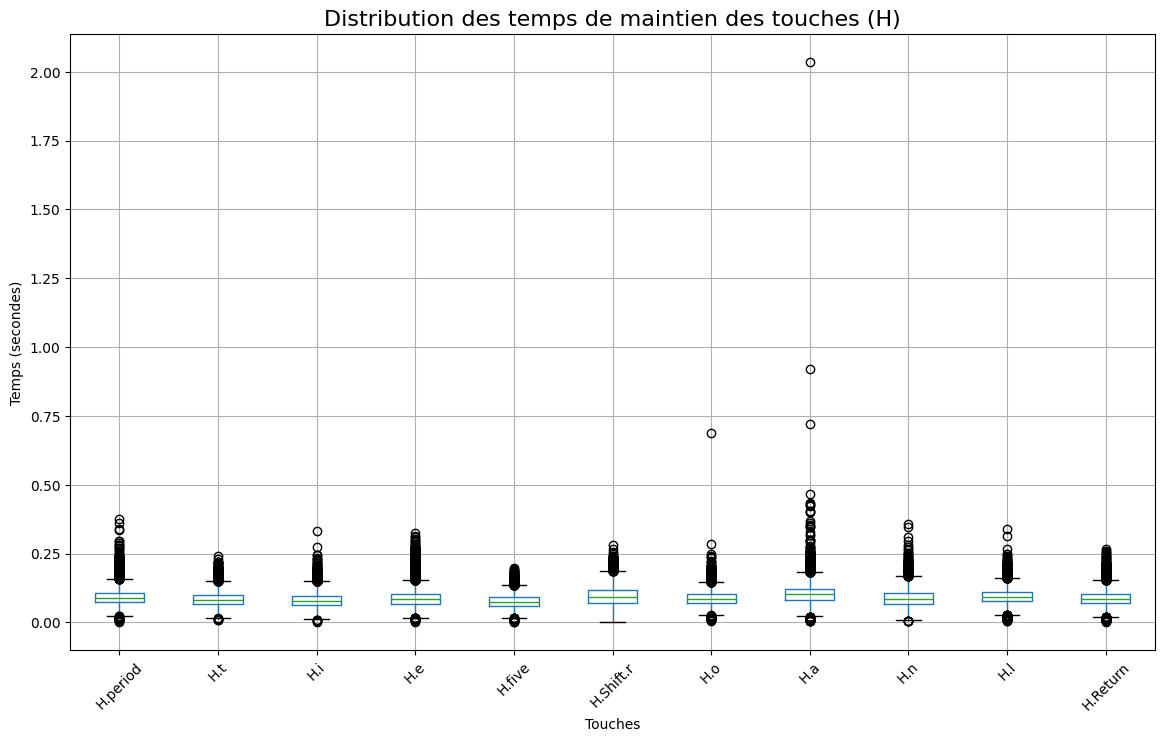

In [18]:
import matplotlib.pyplot as plt

# Sélection des colonnes "H." (temps de maintien)
hold_time_columns = [col for col in data.columns if col.startswith("H.")]
hold_times = data[hold_time_columns]

# Tracer les distributions des temps de maintien
plt.figure(figsize=(14, 8))
hold_times.boxplot(rot=45)
plt.title("Distribution des temps de maintien des touches (H)", fontsize=16)
plt.ylabel("Temps (secondes)")
plt.xlabel("Touches")
plt.show()


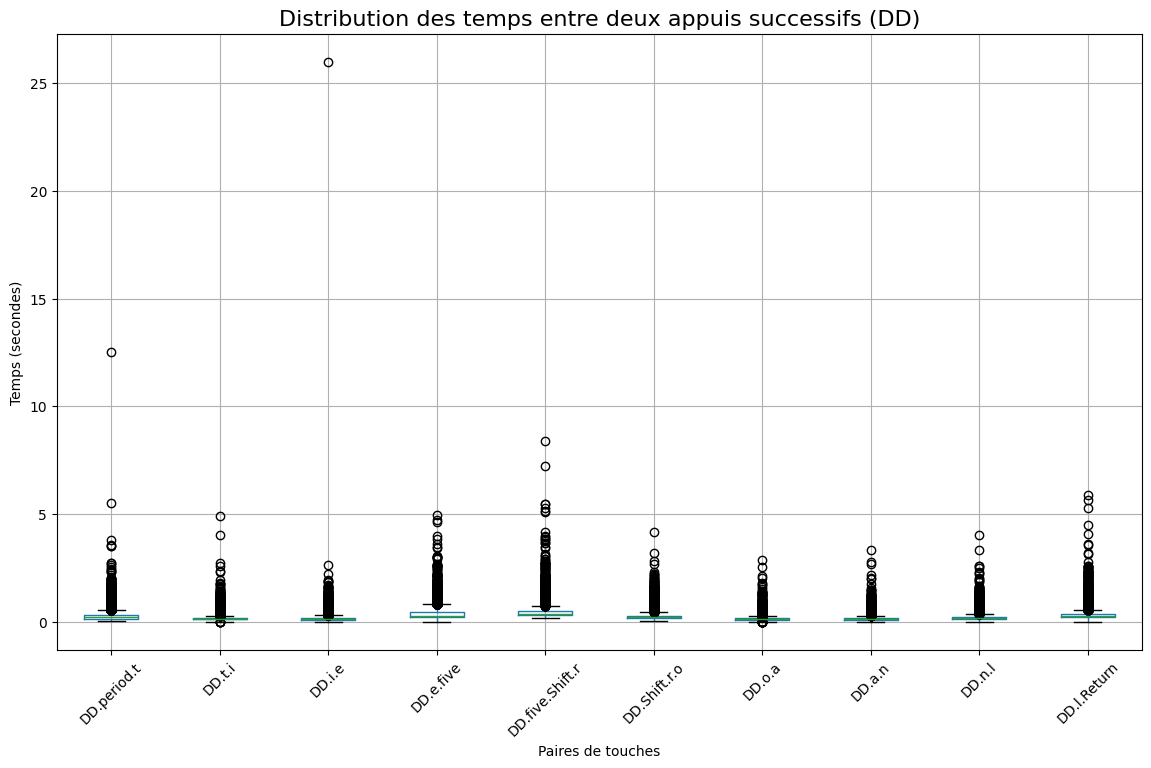

In [19]:
# Sélection des colonnes "DD." (Down-Down Times)
dd_time_columns = [col for col in data.columns if col.startswith("DD.")]
dd_times = data[dd_time_columns]

# Tracer les distributions des temps entre deux appuis successifs (DD)
plt.figure(figsize=(14, 8))
dd_times.boxplot(rot=45)
plt.title("Distribution des temps entre deux appuis successifs (DD)", fontsize=16)
plt.ylabel("Temps (secondes)")
plt.xlabel("Paires de touches")
plt.show()


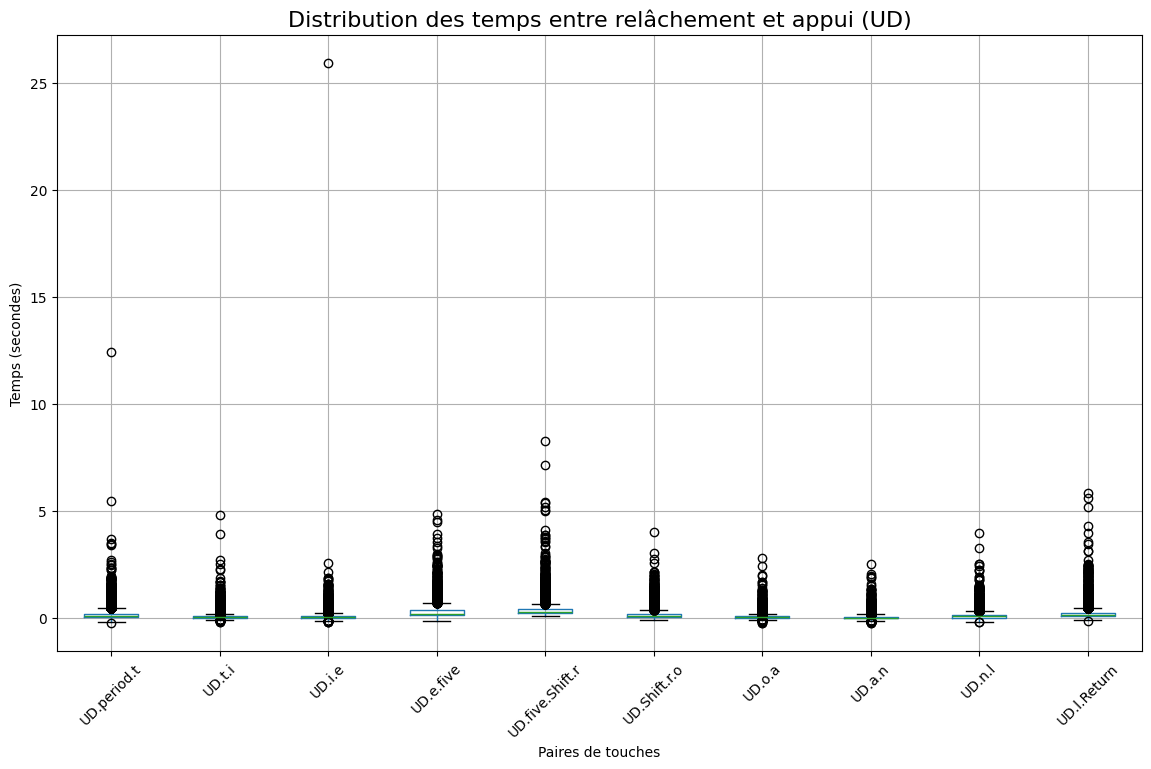

In [20]:
# Sélection des colonnes "UD." (Up-Down Times)
ud_time_columns = [col for col in data.columns if col.startswith("UD.")]
ud_times = data[ud_time_columns]

# Tracer les distributions des temps entre le relâchement et l'appui (UD)
plt.figure(figsize=(14, 8))
ud_times.boxplot(rot=45)
plt.title("Distribution des temps entre relâchement et appui (UD)", fontsize=16)
plt.ylabel("Temps (secondes)")
plt.xlabel("Paires de touches")
plt.show()


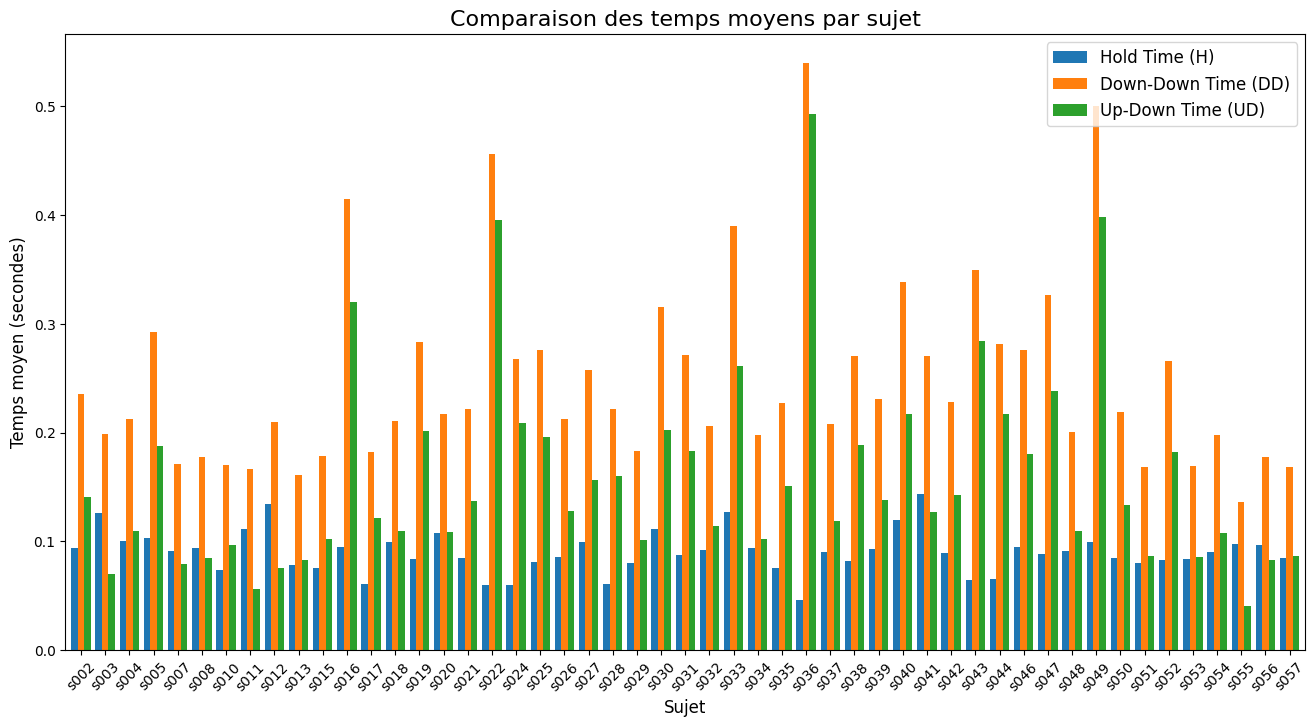

In [21]:
# Calculer la moyenne des temps pour chaque type de frappe (H, DD, UD) par sujet
mean_hold_times = data.groupby("subject")[[col for col in data.columns if col.startswith("H.")]].mean()
mean_dd_times = data.groupby("subject")[[col for col in data.columns if col.startswith("DD.")]].mean()
mean_ud_times = data.groupby("subject")[[col for col in data.columns if col.startswith("UD.")]].mean()

# Moyennes globales par sujet pour chaque catégorie
mean_hold = mean_hold_times.mean(axis=1)  # Moyenne des temps de maintien (H)
mean_dd = mean_dd_times.mean(axis=1)      # Moyenne des temps Down-Down (DD)
mean_ud = mean_ud_times.mean(axis=1)      # Moyenne des temps Up-Down (UD)

# Préparer les données pour visualisation
summary = pd.DataFrame({
    "Hold Time (H)": mean_hold,
    "Down-Down Time (DD)": mean_dd,
    "Up-Down Time (UD)": mean_ud
})

# Tracer les moyennes par sujet
summary.plot(kind="bar", figsize=(16, 8), width=0.8)
plt.title("Comparaison des temps moyens par sujet", fontsize=16)
plt.ylabel("Temps moyen (secondes)", fontsize=12)
plt.xlabel("Sujet", fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc="upper right", fontsize=12)
plt.show()


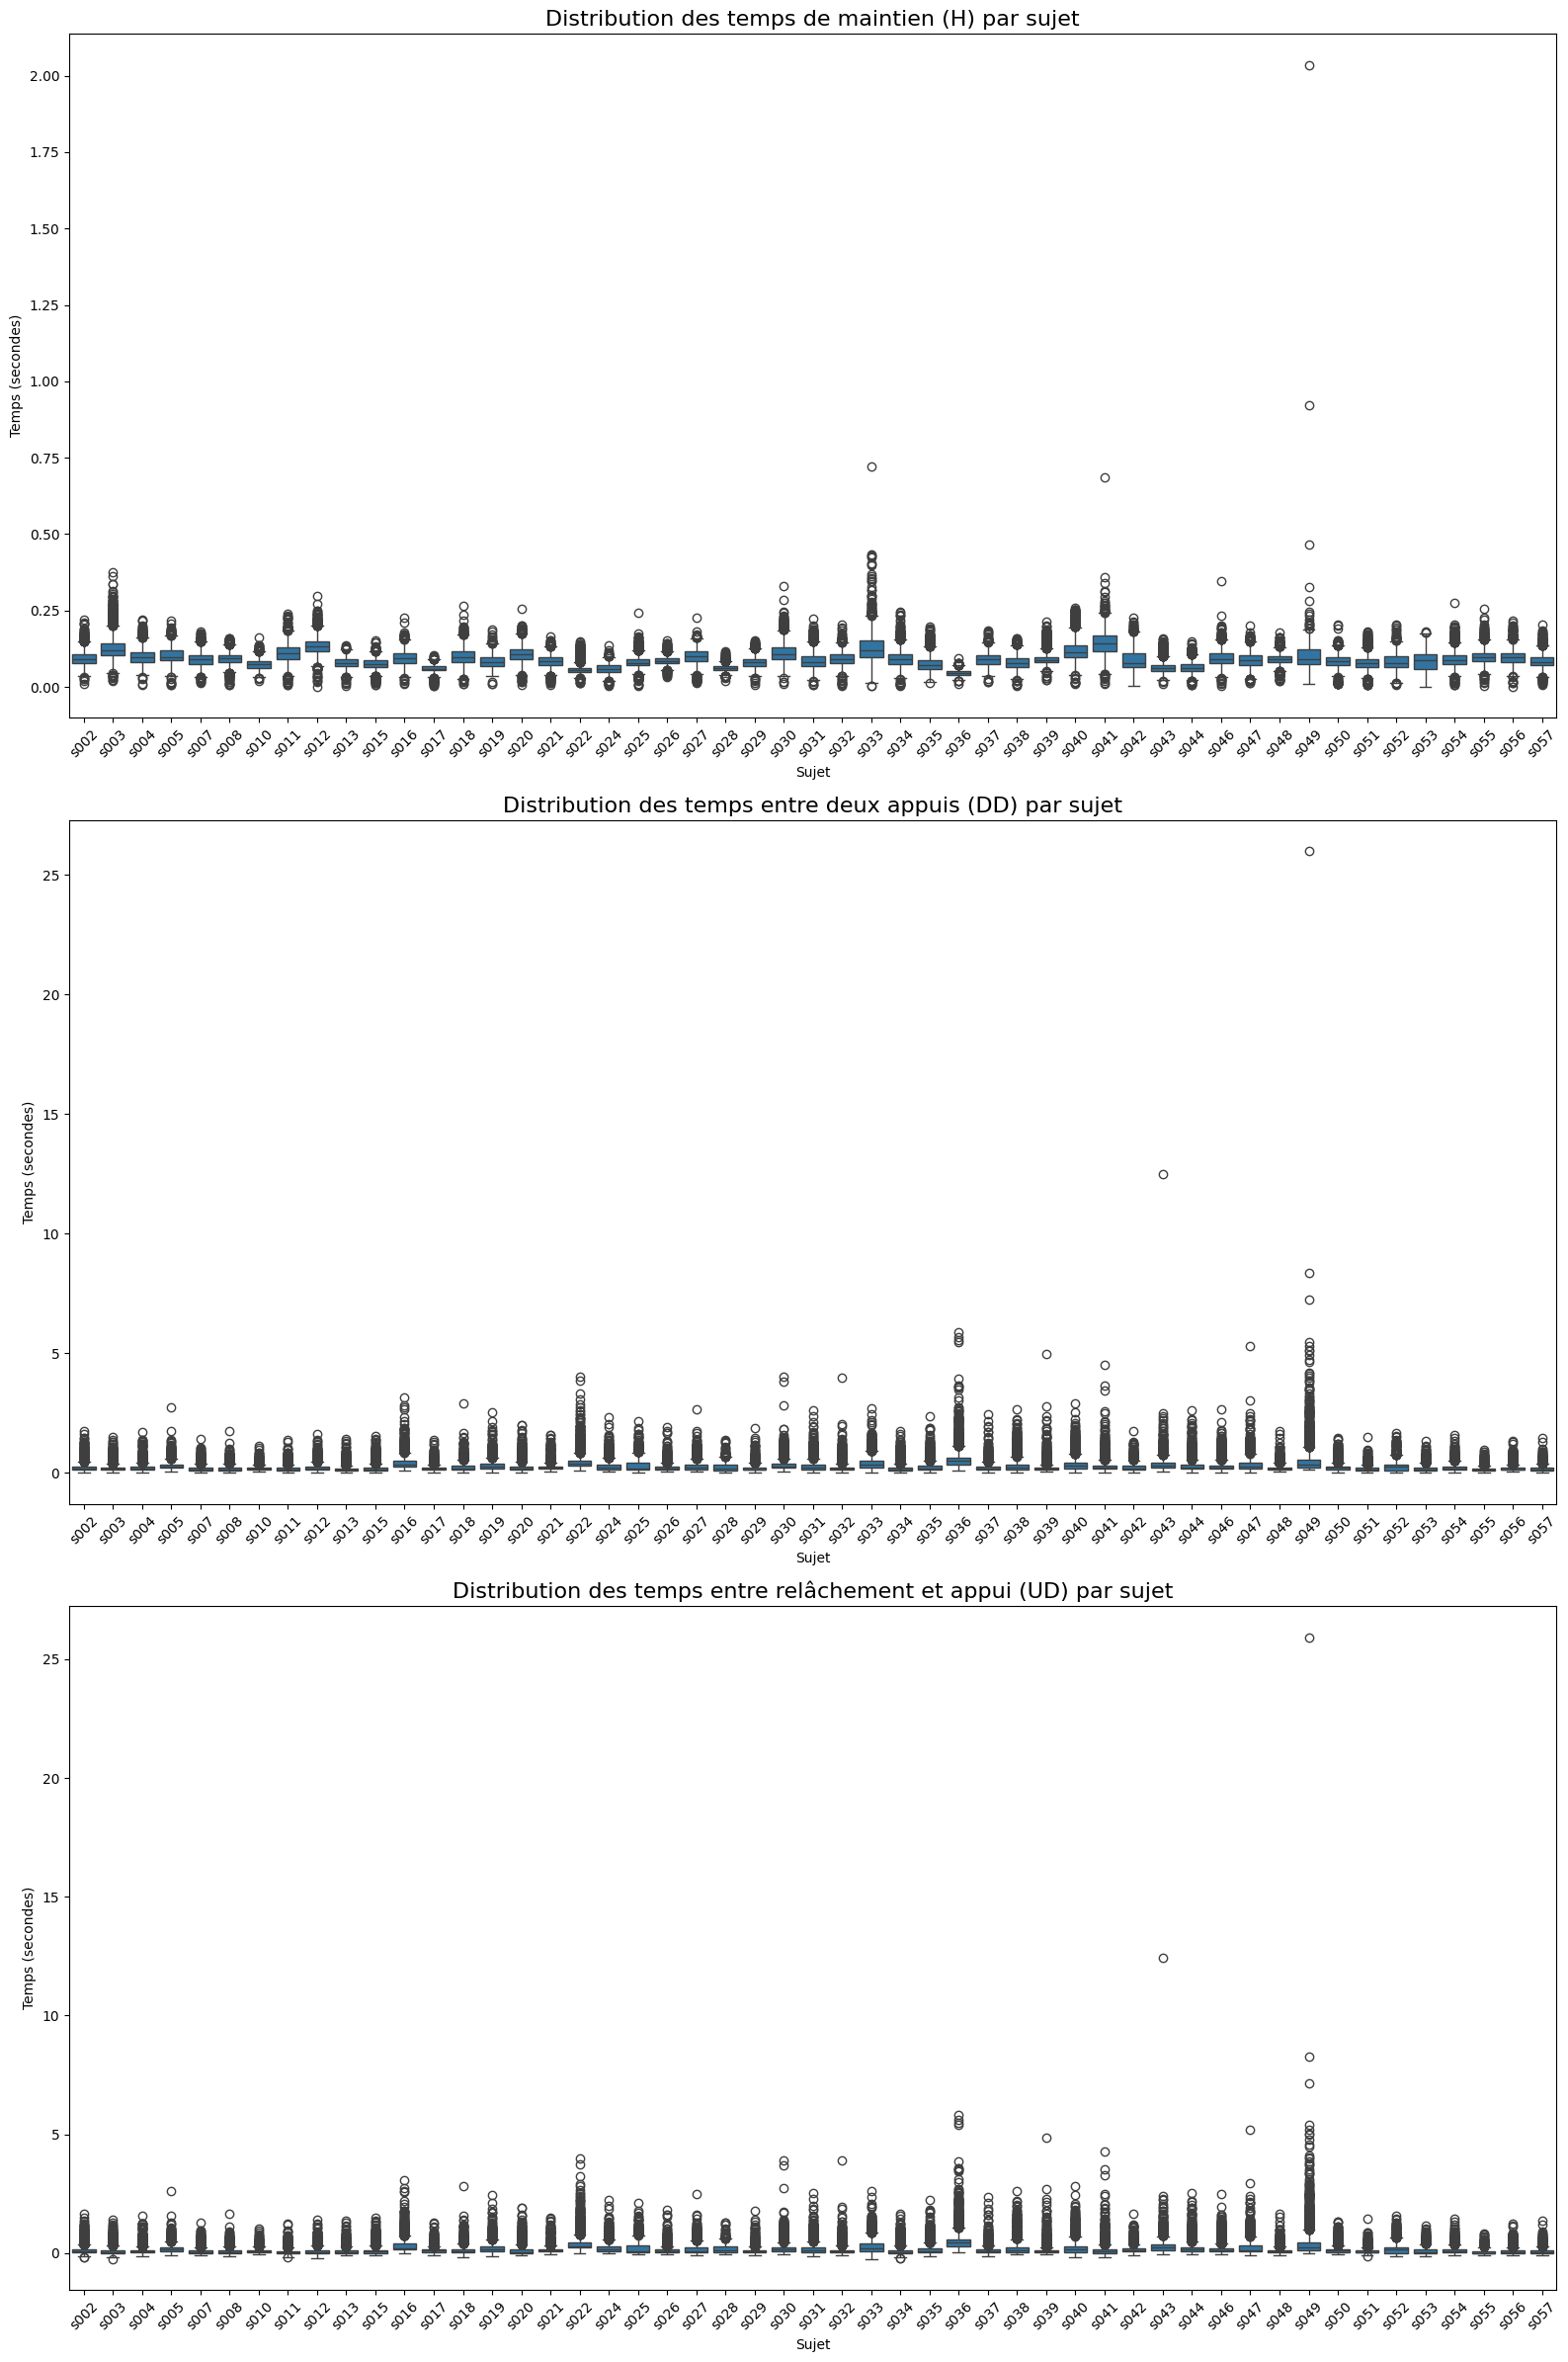

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des colonnes par type
hold_columns = [col for col in data.columns if col.startswith("H.")]
dd_columns = [col for col in data.columns if col.startswith("DD.")]
ud_columns = [col for col in data.columns if col.startswith("UD.")]

# Préparation des données pour le boxplot
hold_data = data.melt(id_vars=["subject"], value_vars=hold_columns, 
                      var_name="Key", value_name="Hold Time (H)")
dd_data = data.melt(id_vars=["subject"], value_vars=dd_columns, 
                    var_name="Key Pair", value_name="Down-Down Time (DD)")
ud_data = data.melt(id_vars=["subject"], value_vars=ud_columns, 
                    var_name="Key Pair", value_name="Up-Down Time (UD)")

# Tracer les boxplots pour chaque type
fig, axes = plt.subplots(3, 1, figsize=(16, 24))

# Boxplot pour les temps de maintien (H)
sns.boxplot(data=hold_data, x="subject", y="Hold Time (H)", ax=axes[0])
axes[0].set_title("Distribution des temps de maintien (H) par sujet", fontsize=16)
axes[0].set_ylabel("Temps (secondes)")
axes[0].set_xlabel("Sujet")
axes[0].tick_params(axis='x', rotation=45)

# Boxplot pour les temps Down-Down (DD)
sns.boxplot(data=dd_data, x="subject", y="Down-Down Time (DD)", ax=axes[1])
axes[1].set_title("Distribution des temps entre deux appuis (DD) par sujet", fontsize=16)
axes[1].set_ylabel("Temps (secondes)")
axes[1].set_xlabel("Sujet")
axes[1].tick_params(axis='x', rotation=45)

# Boxplot pour les temps Up-Down (UD)
sns.boxplot(data=ud_data, x="subject", y="Up-Down Time (UD)", ax=axes[2])
axes[2].set_title("Distribution des temps entre relâchement et appui (UD) par sujet", fontsize=16)
axes[2].set_ylabel("Temps (secondes)")
axes[2].set_xlabel("Sujet")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [23]:
subject_summary = data.groupby("subject").agg(
    mean_hold=("H.period", "mean"),
    std_hold=("H.period", "std"),
    mean_dd=("DD.period.t", "mean"),
    std_dd=("DD.period.t", "std"),
    mean_ud=("UD.period.t", "mean"),
    std_ud=("UD.period.t", "std"),
)
print(subject_summary)


         mean_hold  std_hold   mean_dd    std_dd   mean_ud    std_ud
subject                                                             
s002      0.106958  0.024979  0.169556  0.074073  0.062598  0.069871
s003      0.157293  0.042576  0.169161  0.103577  0.011867  0.118468
s004      0.103745  0.016934  0.201064  0.098102  0.097319  0.096920
s005      0.081963  0.013252  0.278241  0.130109  0.196278  0.131479
s007      0.095211  0.014978  0.176463  0.077947  0.081252  0.076874
s008      0.087904  0.020212  0.207432  0.089809  0.119528  0.086952
s010      0.089034  0.011081  0.149080  0.058210  0.060046  0.057515
s011      0.081427  0.018277  0.165664  0.059374  0.084237  0.058528
s012      0.140250  0.026862  0.185625  0.129261  0.045376  0.119631
s013      0.080338  0.011909  0.128903  0.074959  0.048564  0.073861
s015      0.078122  0.017669  0.168027  0.093954  0.089905  0.089960
s016      0.104281  0.019873  0.435364  0.184738  0.331084  0.188105
s017      0.071280  0.009042  0.18

In [24]:
# Identifier les outliers dans chaque type de temps
def detect_outliers(df, cols, threshold=3):
    outlier_indices = {}
    for col in cols:
        z_scores = (df[col] - df[col].mean()) / df[col].std()
        outlier_indices[col] = df[z_scores.abs() > threshold].index
    return outlier_indices

outliers = detect_outliers(data, [col for col in data.columns if col.startswith(("H.", "DD.", "UD."))])
print(outliers)  # Liste des indices des outliers


{'H.period': Index([  363,   383,   396,   446,   497,   516,   541,   562,   579,   583,
       ...
       14382, 14385, 14386, 14387, 14388, 14392, 14393, 14395, 14396, 14397],
      dtype='int64', length=311), 'DD.period.t': Index([  430,   825,  1201,  1202,  3203,  3248,  4434,  4437,  4441,  4454,
       ...
       18003, 18022, 18027, 18035, 18050, 18074, 18466, 18804, 18806, 19625],
      dtype='int64', length=309), 'UD.period.t': Index([  430,   825,  1201,  1202,  3203,  3248,  4434,  4437,  4441,  4454,
       ...
       18003, 18022, 18027, 18035, 18050, 18074, 18466, 18804, 18806, 19625],
      dtype='int64', length=312), 'H.t': Index([  591,   673,   681,   683,   691,   693,   701,   703,   714,   732,
       ...
       13602, 13650, 13673, 13694, 14065, 14134, 14233, 14286, 14296, 14299],
      dtype='int64', length=175), 'DD.t.i': Index([  403,   408,   513,   687,   791,   898,  1049,  1434,  1987,  2480,
       ...
       17019, 17245, 17250, 17263, 17345, 17409, 179

In [145]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Préparer les données pour le clustering
features = subject_summary.dropna()  # Assurez-vous qu'il n'y a pas de NaN
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)
features["cluster"] = clusters

# Visualiser les clusters
print(features)


         mean_hold  std_hold   mean_dd    std_dd   mean_ud    std_ud  cluster
subject                                                                      
s002      0.106958  0.024979  0.169556  0.074073  0.062598  0.069871        0
s003      0.157293  0.042576  0.169161  0.103577  0.011867  0.118468        0
s004      0.103745  0.016934  0.201064  0.098102  0.097319  0.096920        2
s005      0.081963  0.013252  0.278241  0.130109  0.196278  0.131479        2
s007      0.095211  0.014978  0.176463  0.077947  0.081252  0.076874        2
s008      0.087904  0.020212  0.207432  0.089809  0.119528  0.086952        2
s010      0.089034  0.011081  0.149080  0.058210  0.060046  0.057515        2
s011      0.081427  0.018277  0.165664  0.059374  0.084237  0.058528        2
s012      0.140250  0.026862  0.185625  0.129261  0.045376  0.119631        0
s013      0.080338  0.011909  0.128903  0.074959  0.048564  0.073861        2
s015      0.078122  0.017669  0.168027  0.093954  0.089905  0.08

In [146]:
# On ajoute la colonne 'cluster' à features, avec les indices des clusters pour chaque sujet
data['cluster'] = data['subject'].map(features['cluster'])

# Vérifier que la colonne 'cluster' a bien été ajoutée
print(data[['subject', 'cluster']].head())


  subject  cluster
0    s002        0
1    s002        0
2    s002        0
3    s002        0
4    s002        0


Variance expliquée par chaque composante : [0.26319152 0.16905298]
Variance totale expliquée par les 2 premières composantes : 0.4322444979020622


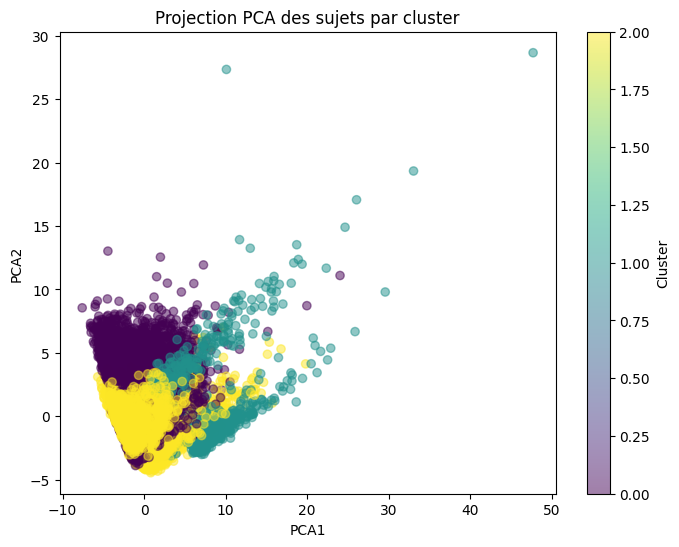

In [147]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sélectionner uniquement les colonnes de timing (H, DD, UD)
timing_columns = [col for col in data.columns if col.startswith(('H', 'DD', 'UD'))]
timing_data = data[timing_columns]

# Normaliser les données (centrer et réduire)
scaler = StandardScaler()
timing_data_scaled = scaler.fit_transform(timing_data)

# Appliquer la PCA
pca = PCA(n_components=2)  # Par exemple, réduire à 2 dimensions
pca_result = pca.fit_transform(timing_data_scaled)

# Ajouter les résultats de la PCA au dataframe
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Visualiser la variance expliquée par chaque composante principale
print(f"Variance expliquée par chaque composante : {pca.explained_variance_ratio_}")
print(f"Variance totale expliquée par les 2 premières composantes : {sum(pca.explained_variance_ratio_)}")

# Visualiser les résultats de la PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data['PCA1'], data['PCA2'], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.title("Projection PCA des sujets par cluster")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label='Cluster')
plt.show()


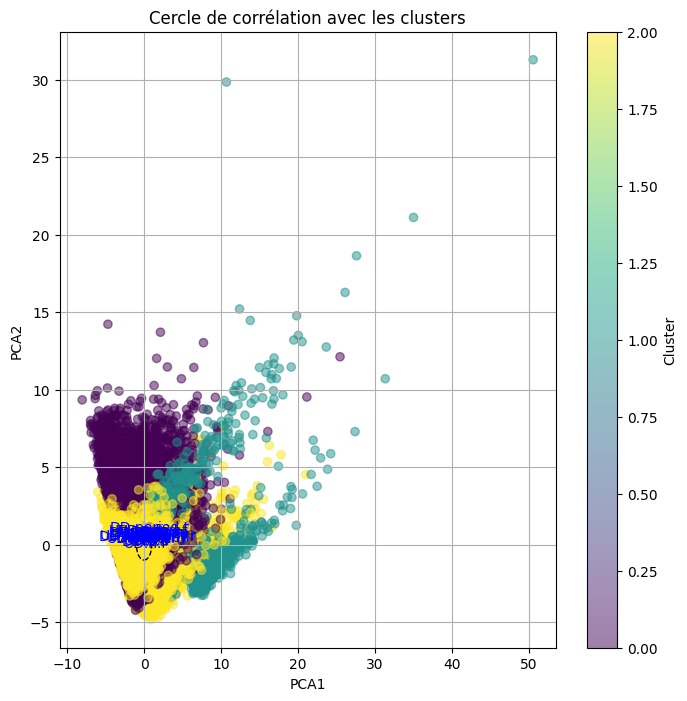

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supposons que 'data' est ton dataframe avec les caractéristiques numériques
X = data.drop(['subject', 'sessionIndex', 'rep', 'cluster'], axis=1)  # Enlever les colonnes non numériques

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer la PCA
pca = PCA(n_components=2)  # Ou plus selon tes besoins
X_pca = pca.fit_transform(X_scaled)

# Extraire les corrélations entre les variables et les composantes principales
correlation_matrix = np.corrcoef(X_scaled.T, rowvar=False)  # Matrice de corrélation entre les variables

# Tracer le cercle de corrélation
plt.figure(figsize=(8, 8))
for i in range(X.shape[1]):
    plt.arrow(0, 0, correlation_matrix[0, i], correlation_matrix[1, i], color='r', alpha=0.7)
    plt.text(correlation_matrix[0, i] * 1.1, correlation_matrix[1, i] * 1.1, X.columns[i], color='blue', ha='center', va='center')

# Tracer les clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')

# Ajouter un cercle pour visualiser la corrélation parfaite
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
plt.gca().add_artist(circle)

plt.title('Cercle de corrélation avec les clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()


In [149]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Préparation des données
X = data.drop(['subject', 'sessionIndex', 'rep'], axis=1)  # On enlève la colonne de l'auteur et les non-relevants
y = data['subject']  # La cible devient l'identité de l'auteur

# Encodage des labels si nécessaire
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Conversion des auteurs en valeurs numériques

# Séparation des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Modèle : Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


              precision    recall  f1-score   support

        s002       0.95      0.86      0.91        72
        s003       0.94      0.93      0.93        69
        s004       0.86      0.95      0.90        73
        s005       0.97      1.00      0.99        73
        s007       0.91      0.93      0.92        54
        s008       0.94      0.84      0.88        87
        s010       0.96      0.95      0.95        97
        s011       0.97      0.92      0.95        75
        s012       0.97      0.91      0.94        93
        s013       0.97      0.96      0.97        72
        s015       0.95      0.94      0.95        87
        s016       0.93      0.99      0.96        85
        s017       1.00      0.98      0.99        82
        s018       0.97      0.85      0.91        73
        s019       0.98      1.00      0.99        80
        s020       0.97      0.88      0.93        86
        s021       0.89      0.98      0.93        86
        s022       1.00    

In [150]:
# import pandas as pd
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss, roc_auc_score
# import time

# class ModelMetrics:
#     def __init__(self, model_name):
#         self.model_name = model_name
#         self.metrics = {
#             'model_name': model_name,
#             'accuracy': None,
#             'precision': None,
#             'recall': None,
#             'f1_score': None,
#             'log_loss': None,
#             'auc_roc': None,
#             'confusion_matrix': None,
#             'training_time': None,
#             'precision_recall_curve': None
#         }
        
#     def calculate_metrics(self, model, X_train, X_test, y_train, y_test):
#         # Enregistrement du temps d'entraînement
#         start_time = time.time()
#         model.fit(X_train, y_train)
#         training_time = time.time() - start_time
        
#         # Prédictions des classes
#         y_pred = model.predict(X_test)

#         # Si le modèle a la méthode predict_proba, nous pouvons aussi récupérer les probabilités
#         y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
        
#         # Calcul des métriques
#         self.metrics['accuracy'] = accuracy_score(y_test, y_pred)
#         self.metrics['precision'] = precision_score(y_test, y_pred, average='macro')
#         self.metrics['recall'] = recall_score(y_test, y_pred, average='macro')
#         self.metrics['f1_score'] = f1_score(y_test, y_pred, average='macro')
#         self.metrics['log_loss'] = log_loss(y_test, y_pred_proba) if y_pred_proba is not None else None
#         self.metrics['AUC'] = roc_auc_score(y_test, y_pred_proba, multi_class='ovr') if y_pred_proba is not None else None
#         self.metrics['training_time'] = training_time
    
#         # Matrice de confusion
#         self.metrics['confusion_matrix'] = confusion_matrix(y_test, y_pred)

        
#     def precision_recall_curve(self, model, X_test, y_test):
#         if hasattr(model, "predict_proba"):
#             from sklearn.metrics import precision_recall_curve
#             y_pred_proba = model.predict_proba(X_test)[:, 1]
#             precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
#             self.metrics['precision_recall_curve'] = (precision, recall, thresholds)

#     def get_metrics(self):
#         return self.metrics
    
#     def display_metrics(self):
#         metrics_df = pd.DataFrame([self.metrics])
#         return metrics_df


In [31]:
import time

class ModelMetrics:
    def __init__(self, model_name, metrics=["accuracy"]):
        """
        Initialisation de l'objet pour stocker les métriques du modèle.
        
        :param model_name: Nom du modèle à évaluer.
        :param metrics: Liste des métriques à calculer, par défaut l'accuracy.
        """
        self.model_name = model_name
        self.metrics = metrics  # Liste des métriques à calculer
        self.results = {}

    def calculate_metrics(self, model, X_train, X_test, y_train, y_test):
        """
        Méthode pour entraîner et évaluer le modèle, puis enregistrer les résultats.
        
        :param model: Le modèle d'apprentissage à évaluer.
        :param X_train: Données d'entraînement.
        :param X_test: Données de test.
        :param y_train: Cibles d'entraînement.
        :param y_test: Cibles de test.
        """
        # Enregistrement du temps d'entraînement
        start_time = time.time()
        model.fit(X_train, y_train)  # Entraînement du modèle
        training_time = time.time() - start_time  # Temps d'entraînement
        
        # Évaluation du modèle sur l'ensemble de test
        evaluation_results = model.evaluate(X_test, y_test, verbose=0)
        
        # Enregistrement des résultats pour les métriques sélectionnées
        for metric, value in zip(self.metrics, evaluation_results):
            self.results[metric] = value
        
        # Enregistrement du temps d'entraînement
        self.results['training_time'] = training_time

    def display_metrics(self):
        """
        Affichage des résultats enregistrés sous forme lisible.
        
        :return: Une chaîne contenant les métriques du modèle.
        """
        metrics_str = "\n".join([f"{metric}: {self.results[metric]:.4f}" for metric in self.results])
        return f"{self.model_name} Metrics:\n{metrics_str}"



In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


# Retirer les colonnes non pertinentes
data_cleaned = data.drop(['subject', 'sessionIndex', 'rep', 'cluster'], axis=1)

# Sélectionner uniquement les colonnes quantitatives (numériques)
X = data_cleaned.select_dtypes(include=['float64', 'int64'])  # Sélectionne les colonnes numériques
y = data['subject']  # Remplacer 'target' par le nom de ta cible, si nécessaire

# Séparer les données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Appliquer la normalisation (standardisation)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner un modèle MLP avec les données normalisées
model = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)

# Évaluer le modèle
accuracy = model.score(X_test_scaled, y_test)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8900


In [26]:

# Exemple d'utilisation avec un modèle MLP (assurez-vous que `model` soit un modèle déjà défini et compilé)

mlp_metrics = ModelMetrics('MLP', metrics=["accuracy"])  # Crée un objet pour suivre l'accuracy
mlp_metrics.calculate_metrics(model, X_train, X_test, y_train, y_test)  # Calcul des métriques
print(mlp_metrics.display_metrics())  # Affichage des résultats du modèle


c:\Users\Admin.local\Documents\ml_biodynamic\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


AttributeError: 'MLPClassifier' object has no attribute 'evaluate'

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Retirer les colonnes non pertinentes
data_cleaned = data.drop(['subject', 'sessionIndex', 'rep', 'cluster'], axis=1)

# Sélectionner uniquement les colonnes quantitatives (numériques)
X = data_cleaned.select_dtypes(include=['float64', 'int64'])  # Sélectionne les colonnes numériques
y = data['subject']  # La colonne 'subject' comme cible

# Vérifier que les cibles sont des entiers (classes)
y = pd.Categorical(y).codes  # Encoder les labels de 'subject' en entiers si ce n'est pas déjà fait

# Séparer les données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Appliquer la normalisation (standardisation)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création du modèle
model = Sequential()

# Couches cachées
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Première couche cachée
model.add(Dense(64, activation='relu'))  # Deuxième couche cachée

# Couche de sortie
model.add(Dense(len(set(y)), activation='softmax'))  # Nombre de classes (auteurs)

# Compilation du modèle
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraînement
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Affichage de la précision du modèle sur les données de test
test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {test_accuracy[1]:.4f}")



Epoch 1/50


c:\Users\Admin.local\Documents\ml_biodynamic\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3406 - loss: 2.6983 - val_accuracy: 0.7608 - val_loss: 0.9536
Epoch 2/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7846 - loss: 0.8228 - val_accuracy: 0.8119 - val_loss: 0.6848
Epoch 3/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8471 - loss: 0.5776 - val_accuracy: 0.8453 - val_loss: 0.5681
Epoch 4/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8597 - loss: 0.5006 - val_accuracy: 0.8547 - val_loss: 0.5139
Epoch 5/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8822 - loss: 0.4156 - val_accuracy: 0.8587 - val_loss: 0.4957
Epoch 6/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8885 - loss: 0.3808 - val_accuracy: 0.8730 - val_loss: 0.4480
Epoch 7/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9065 - loss: 0.3291 - val_accuracy: 0.8812 - val_loss: 0.4194
Epoch 8/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9095 - loss: 0.3019 - val_accuracy: 0.8866 - val_

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Reshape les données pour les passer dans le LSTM (ex: [samples, time_steps, features])
X_train_reshaped = X_train_scaled.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Création du modèle
model = Sequential()

# Ajouter une couche LSTM
model.add(LSTM(128, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=False))

# Couche de sortie
model.add(Dense(len(set(y)), activation='softmax'))  # Nombre d'auteurs (classes)

# Compilation du modèle
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraînement
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test))


Epoch 1/50


c:\Users\Admin.local\Documents\ml_biodynamic\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3315 - loss: 3.1501 - val_accuracy: 0.6990 - val_loss: 1.4494
Epoch 2/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7515 - loss: 1.1919 - val_accuracy: 0.8016 - val_loss: 0.8315
Epoch 3/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8337 - loss: 0.7212 - val_accuracy: 0.8404 - val_loss: 0.6397
Epoch 4/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8595 - loss: 0.5617 - val_accuracy: 0.8598 - val_loss: 0.5441
Epoch 5/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8805 - loss: 0.4732 - val_accuracy: 0.8701 - val_loss: 0.4863
Epoch 6/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8979 - loss: 0.4028 - val_accuracy: 0.8773 - val_loss: 0.4447
Epoch 7/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9057 - loss: 0.3668 - val_accuracy: 0.8871 - val_loss: 0.4155
Epoch 8/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9169 - loss: 0.3221 - val_accuracy: 0.8900 - val_

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

# Reshape les données pour passer dans le GRU
X_train_reshaped = X_train_scaled.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Création du modèle
model = Sequential()

# Ajouter une couche GRU
model.add(GRU(128, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=False))

# Couche de sortie
model.add(Dense(len(set(y)), activation='softmax'))  # Nombre d'auteurs (classes)

# Compilation du modèle
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraînement
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test))


Epoch 1/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3506 - loss: 2.9158 - val_accuracy: 0.7636 - val_loss: 1.1834
Epoch 2/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7882 - loss: 0.9875 - val_accuracy: 0.8281 - val_loss: 0.7232
Epoch 3/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8474 - loss: 0.6508 - val_accuracy: 0.8523 - val_loss: 0.5876
Epoch 4/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8720 - loss: 0.5170 - val_accuracy: 0.8627 - val_loss: 0.5150
Epoch 5/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8882 - loss: 0.4429 - val_accuracy: 0.8729 - val_loss: 0.4704
Epoch 6/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8954 - loss: 0.3932 - val_accuracy: 0.8822 - val_loss: 0.4353
Epoch 7/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9097 - loss: 0.3486 - val_accuracy: 0.8882 - val_loss: 0.4032
Epoch 8/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9160 - loss: 0.3126 - val_accuracy: 0.

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Retirer les colonnes non pertinentes
data_cleaned = data.drop(['subject', 'sessionIndex', 'rep', 'cluster'], axis=1)

# Sélectionner uniquement les colonnes quantitatives (numériques)
X = data_cleaned.select_dtypes(include=['float64', 'int64'])  # Sélectionne les colonnes numériques
y = data['subject']  # La colonne 'subject' comme cible

# Encoder les labels en entiers si ce n'est pas déjà fait
y = pd.Categorical(y).codes  # Encoder les labels de 'subject' en entiers si ce n'est pas déjà fait

# Séparer les données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Appliquer la normalisation (standardisation)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création du modèle MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=50, random_state=42)

# Entraînement du modèle
model.fit(X_train_scaled, y_train)

# Précision sur les données de test
test_accuracy = model.score(X_test_scaled, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


Test accuracy: 0.9060


c:\Users\Admin.local\Documents\ml_biodynamic\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [151]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Retirer les colonnes non pertinentes
data_cleaned = data.drop(['subject', 'sessionIndex', 'rep','PCA1','PCA2','cluster'], axis=1)

# Sélectionner uniquement les colonnes quantitatives (numériques)
X = data_cleaned.select_dtypes(include=['float64', 'int64'])  # Sélectionne les colonnes numériques
y = data['subject']  # La colonne 'subject' comme cible

# Encoder les labels en entiers si ce n'est pas déjà fait
y = pd.Categorical(y).codes  # Encoder les labels de 'subject' en entiers si ce n'est pas déjà fait

# Séparer les données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Appliquer la normalisation (standardisation)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création du modèle MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=50, random_state=42)

# Entraînement du modèle
model.fit(X_train_scaled, y_train)

# Précision sur les données de test
test_accuracy = model.score(X_test_scaled, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


Test accuracy: 0.9101


c:\Users\Admin.local\Documents\ml_biodynamic\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [109]:
def predict_author_with_threshold(model, scaler, data, threshold, classes):
    # Prétraiter les données
    data_scaled = scaler.transform(data.reshape(1, -1))
    
    # Prédiction des probabilités
    probabilities = model.predict_proba(data_scaled)[0]
    
    # Identifier la classe avec la probabilité maximale
    max_prob = np.max(probabilities)
    predicted_class = classes[np.argmax(probabilities)]
        
    # Vérifier si la probabilité maximale dépasse le seuil
    accepted = max_prob >= threshold
    
    # Retourner un dictionnaire avec les résultats
    return {
        "predicted_class": predicted_class,
        "max_prob": max_prob,
        "accepted": accepted
    }

In [156]:
df=pd.read_csv('keyboard_capture.csv')

In [157]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,MMM,1,0,0.659619,1.021056,0.361438,0.109797,0.455094,0.345297,0.117710,...,0.141288,0.377117,0.235829,0.110280,0.489206,0.378926,0.080617,0.612657,0.532041,0.078602
1,MMM,1,1,0.346141,0.738455,0.392313,0.110017,0.581249,0.471232,0.109748,...,0.109847,0.377133,0.267287,0.109915,0.470679,0.360763,0.062953,0.550101,0.487148,0.078341
2,MMM,1,2,0.800843,1.114353,0.313510,0.111021,0.533584,0.422563,0.109669,...,0.156699,0.361110,0.204412,0.109662,0.408364,0.298702,0.117226,0.596418,0.479193,0.062929
3,MMM,1,3,0.533656,0.801111,0.267455,0.125269,0.569985,0.444717,0.121820,...,0.109854,0.329933,0.220078,0.109885,0.439315,0.329430,0.109930,0.863169,0.753239,0.078334
4,MMM,1,4,0.396537,0.759197,0.362660,0.077172,0.518937,0.441766,0.124829,...,0.125486,0.408237,0.282751,0.109884,0.423990,0.314106,0.078544,0.613986,0.535442,0.082362


In [158]:
data_cleaned.columns

Index(['H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i',
       'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five', 'H.five',
       'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o',
       'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n',
       'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return',
       'H.Return'],
      dtype='object')

In [159]:
col=['subject', 'sessionIndex', 'rep', 'H.period', 'DD.period.t',
       'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e',
       'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r',
       'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o',
       'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l',
       'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return']

In [160]:
df.columns=col

In [161]:
df.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,MMM,1,0,0.659619,1.021056,0.361438,0.109797,0.455094,0.345297,0.117710,...,0.141288,0.377117,0.235829,0.110280,0.489206,0.378926,0.080617,0.612657,0.532041,0.078602
1,MMM,1,1,0.346141,0.738455,0.392313,0.110017,0.581249,0.471232,0.109748,...,0.109847,0.377133,0.267287,0.109915,0.470679,0.360763,0.062953,0.550101,0.487148,0.078341
2,MMM,1,2,0.800843,1.114353,0.313510,0.111021,0.533584,0.422563,0.109669,...,0.156699,0.361110,0.204412,0.109662,0.408364,0.298702,0.117226,0.596418,0.479193,0.062929
3,MMM,1,3,0.533656,0.801111,0.267455,0.125269,0.569985,0.444717,0.121820,...,0.109854,0.329933,0.220078,0.109885,0.439315,0.329430,0.109930,0.863169,0.753239,0.078334
4,MMM,1,4,0.396537,0.759197,0.362660,0.077172,0.518937,0.441766,0.124829,...,0.125486,0.408237,0.282751,0.109884,0.423990,0.314106,0.078544,0.613986,0.535442,0.082362


In [162]:
observations = df.copy()
observations = observations.drop(['subject', 'sessionIndex', 'rep'], axis=1)


In [163]:
classes = np.unique(y)  # Classes uniques (auteurs)

In [164]:
# Résultats des prédictions
results = []

# Parcourir chaque observation
for i, observation in enumerate(observations.values):
   
    
    # Utiliser la fonction de prédiction avec un seuil
    result = predict_author_with_threshold(
        model=model,
        scaler=scaler,
        data=observation,
        threshold=0.8,
        classes=classes
    )
    
    # Vérifier le type et le contenu de result
    print(f"Result for observation {i + 1}: {result} (type: {type(result)})")
    
    # Ajouter le résultat dans une liste
    if isinstance(result, dict):
        results.append({"observation": i + 1, "predicted_class": result["predicted_class"], 
                        "max_prob": result["max_prob"], "accepted": result["accepted"]})
    else:
        print(f"Erreur: Le résultat pour l'observation {i + 1} n'est pas un dictionnaire.")

# Afficher les résultats
for res in results:
    print(f"Observation {res['observation']}: "
          f"Prédiction: {res['predicted_class']} "
          f"(Probabilité: {res['max_prob']:.2f}, Acceptée: {res['accepted']})")

Result for observation 1: {'predicted_class': np.int8(13), 'max_prob': np.float64(0.9999925723825347), 'accepted': np.True_} (type: <class 'dict'>)
Result for observation 2: {'predicted_class': np.int8(13), 'max_prob': np.float64(0.9990734408236831), 'accepted': np.True_} (type: <class 'dict'>)
Result for observation 3: {'predicted_class': np.int8(13), 'max_prob': np.float64(0.9997817814150275), 'accepted': np.True_} (type: <class 'dict'>)
Result for observation 4: {'predicted_class': np.int8(13), 'max_prob': np.float64(0.999999275590297), 'accepted': np.True_} (type: <class 'dict'>)
Result for observation 5: {'predicted_class': np.int8(13), 'max_prob': np.float64(0.9999558615406842), 'accepted': np.True_} (type: <class 'dict'>)
Result for observation 6: {'predicted_class': np.int8(13), 'max_prob': np.float64(0.9999982350992873), 'accepted': np.True_} (type: <class 'dict'>)
Result for observation 7: {'predicted_class': np.int8(13), 'max_prob': np.float64(0.9999989048168813), 'accepted'

c:\Users\Admin.local\Documents\ml_biodynamic\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin.local\Documents\ml_biodynamic\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin.local\Documents\ml_biodynamic\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin.local\Documents\ml_biodynamic\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin.local\Documents\ml_biodynamic\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with f

In [165]:
data = pd.read_csv(file_path)

In [166]:
data.columns

Index(['subject', 'sessionIndex', 'rep', 'H.period', 'DD.period.t',
       'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e',
       'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r',
       'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o',
       'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l',
       'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return'],
      dtype='object')

In [167]:
df.columns

Index(['subject', 'sessionIndex', 'rep', 'H.period', 'DD.period.t',
       'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e',
       'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r',
       'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o',
       'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l',
       'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return'],
      dtype='object')

In [168]:
df_control=df.iloc[[0]]

In [169]:
df_train=df.iloc[1:]

In [170]:
# Ajouter les nouvelles observations

updated_data = pd.concat([data, df_train], ignore_index=True)


In [171]:
# Retirer les colonnes non pertinentes
data_cleaned = updated_data.drop(['subject', 'sessionIndex', 'rep'], axis=1)


In [172]:

# Sélectionner uniquement les colonnes quantitatives (numériques)
X = data_cleaned.select_dtypes(include=['float64', 'int64'])  # Sélectionne les colonnes numériques
y = updated_data['subject']  # La colonne 'subject' comme cible

# Encoder les labels en entiers si ce n'est pas déjà fait
y = pd.Categorical(y).codes  # Encoder les labels de 'subject' en entiers si ce n'est pas déjà fait

# Séparer les données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Appliquer la normalisation (standardisation)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création du modèle MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=50, random_state=42)

# Entraînement du modèle
model.fit(X_train_scaled, y_train)

# Précision sur les données de test
test_accuracy = model.score(X_test_scaled, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9051


c:\Users\Admin.local\Documents\ml_biodynamic\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [173]:

input_data=df_control.drop(['subject', 'sessionIndex', 'rep'], axis=1)



In [178]:

# Saisie renforcée
result = predict_author_with_threshold(
        model=model,
        scaler=scaler,
        data=input_data.values,
        threshold=0.8,
        classes=classes
    )


# Affichage du résultat
if result["accepted"] and result["predicted_class"] == "NouvelAuteur":
    print("Utilisateur reconnu comme le nouvel auteur.")
else:
    print("Vérification échouée. Accès refusé.")


Vérification échouée. Accès refusé.


c:\Users\Admin.local\Documents\ml_biodynamic\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [179]:
result

{'predicted_class': np.int8(0),
 'max_prob': np.float64(0.9999999999653295),
 'accepted': np.True_}